<a href="https://colab.research.google.com/github/Fredrick-kyalo/Text_classification/blob/main/Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score


In [ ]:
data = pd.read_csv('heart_disease_uci.csv')
#del data['']
data.tail()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
data.dropna(inplace=True)

In [ ]:
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [ ]:
x = data.drop(columns=['num'])
y = data['num']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y)
print(x_train.shape)
print(x_test.shape)

(224, 15)
(75, 15)


Regular Tree

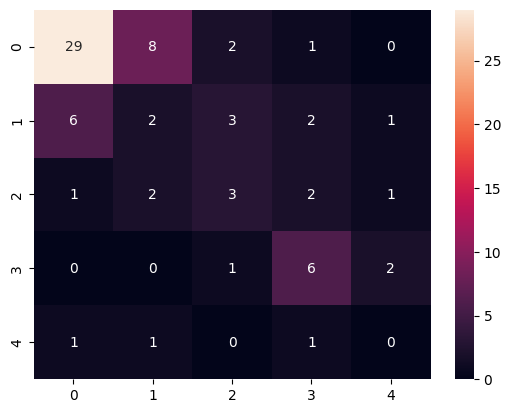

In [ ]:
clf= tree.DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [ ]:
#plt.figure(figsize = (100, 60))
#tree.plot_tree(clf, filled=True)
#plt.show()

print(accuracy_score(y_test, y_test_pred))

0.8470948012232415


Pruning

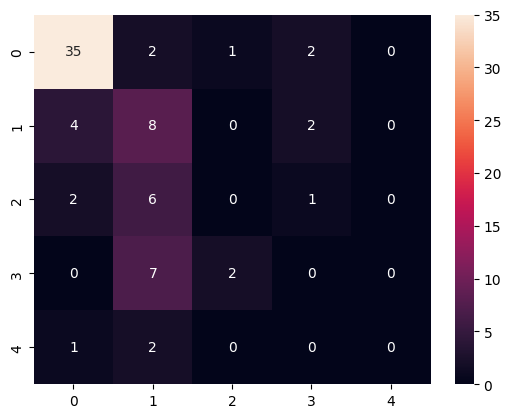

0.5733333333333334


In [ ]:
pr_clf= tree.DecisionTreeClassifier(max_depth=3,random_state=0)
pr_clf.fit(x_train,y_train)
#y_train_pred=clf.predict(x_train)
y_test_pred=pr_clf.predict(x_test)

cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()
print(accuracy_score(y_test, y_test_pred))

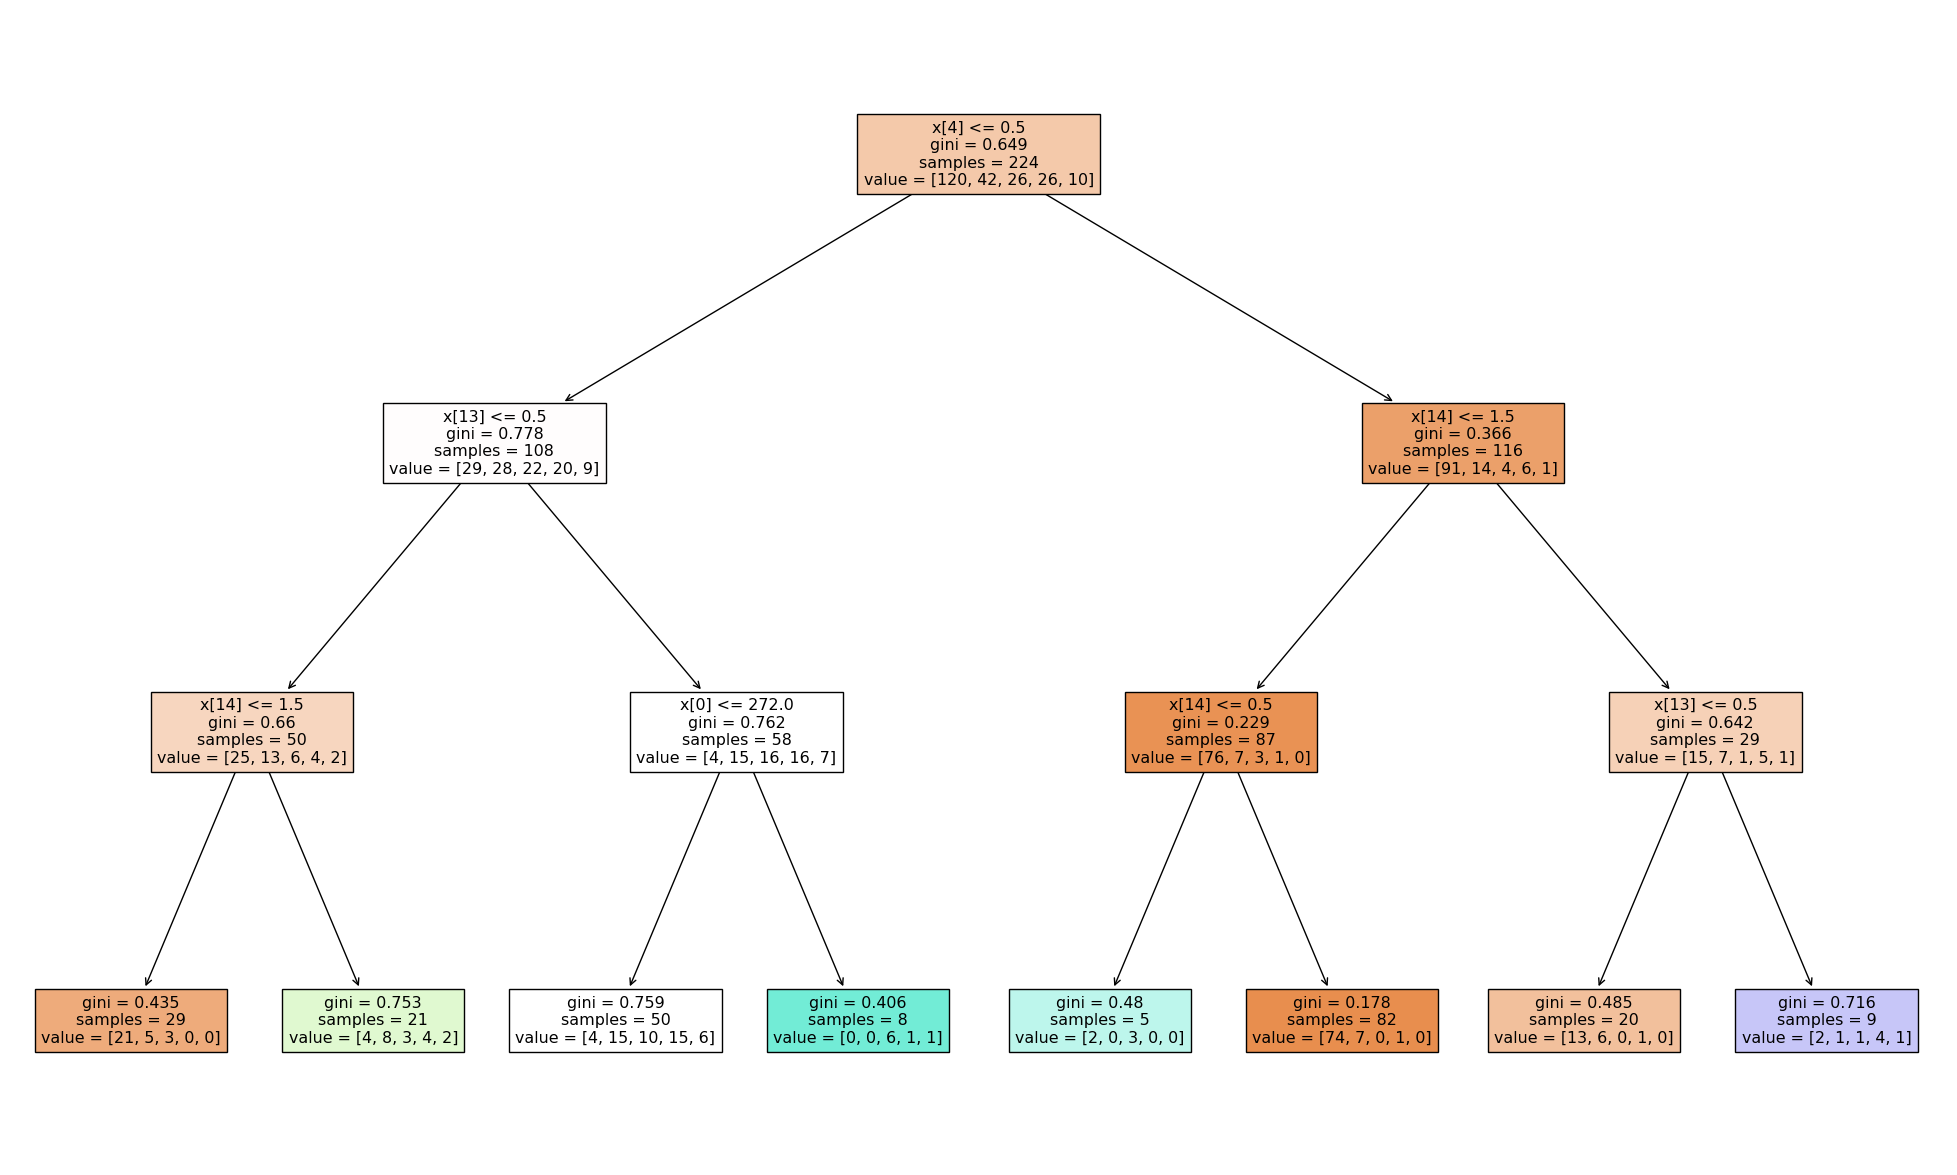

0.5733333333333334


In [ ]:
plt.figure(figsize = (25, 15))
tree.plot_tree(pr_clf, filled=True)
plt.show()

print(accuracy_score(y_test, y_test_pred))

###Random Forest

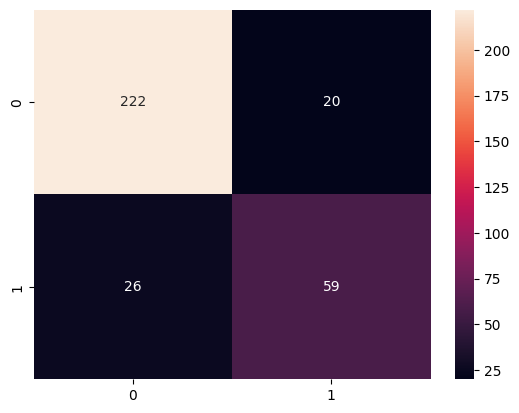

0.8593272171253823


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFR
rf_clf = RFR(random_state=0,max_depth=2,n_estimators=2)

rf_clf.fit(x_train, y_train)

y_test_pred = rf_clf.predict(x_test)

rf_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(rf_cm, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_test, y_test_pred))
